# 1

Download the minnesota graph (attached) and plot it

In [76]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import HBox, VBox

The edege file has tuples of form (nodeI, nodeJ). Node I and J are identifiers that are given to the nodes when read from the verts file line by line. In the first line (line 0) of the verts file, there are the coordinates of the first node, in the second line (line 1) there are the coordinates of the second node, and so on. The node identifiers are the line numbers of the verts file, starting from 0. 

Read and create vertices


In [77]:
#read ./minnesota/verts.txt and ./minnesota/edges.txt
#output ./minnesota/verts.txt and ./minnesota/edges.txt

with open('minnesota/verts.txt', 'r') as vertsFile:
    position = vertsFile.readlines()
    position = [x.strip() for x in position]
    position = [x.split() for x in position]
    position = [[np.float64(x[0]), np.float64(x[1])] for x in position]

verts = [x for x in range(len(position))]
print(f"Len verts: {len(verts)}")
print(f"Len position: {len(position)}")

Len verts: 2635
Len position: 2635


In [78]:

G = nx.Graph()
G.add_nodes_from(verts)
for i in range(len(position)):
    G.nodes[i]['pos'] = position[i]

with open('minnesota/edges.txt', 'r') as edgesFile:
    edges = edgesFile.readlines()
    edges = [x.strip() for x in edges]
    edges = [x.split() for x in edges]
    edges = [[np.float64(x[0]), np.float64(x[1])] for x in edges]

print(f"Len edges: {len(edges)}")
print(f"Edges: {edges}")
G.add_edges_from(edges)

pos = nx.get_node_attributes(G, 'pos')




Len edges: 3298
Edges: [[0.0, 6.0], [1.0, 16.0], [2.0, 3.0], [2.0, 11.0], [4.0, 9.0], [5.0, 8.0], [6.0, 7.0], [6.0, 14.0], [8.0, 9.0], [8.0, 12.0], [9.0, 10.0], [10.0, 11.0], [10.0, 43.0], [11.0, 20.0], [12.0, 18.0], [13.0, 14.0], [14.0, 15.0], [15.0, 16.0], [15.0, 34.0], [16.0, 31.0], [17.0, 18.0], [18.0, 19.0], [19.0, 22.0], [19.0, 51.0], [20.0, 21.0], [20.0, 23.0], [21.0, 39.0], [22.0, 44.0], [23.0, 31.0], [24.0, 25.0], [25.0, 26.0], [25.0, 28.0], [26.0, 29.0], [26.0, 30.0], [27.0, 28.0], [27.0, 35.0], [28.0, 29.0], [29.0, 36.0], [30.0, 37.0], [31.0, 34.0], [31.0, 41.0], [32.0, 33.0], [32.0, 34.0], [32.0, 40.0], [34.0, 42.0], [35.0, 38.0], [36.0, 38.0], [37.0, 38.0], [37.0, 44.0], [38.0, 47.0], [39.0, 71.0], [40.0, 46.0], [41.0, 52.0], [42.0, 54.0], [43.0, 56.0], [44.0, 49.0], [45.0, 46.0], [46.0, 60.0], [47.0, 48.0], [47.0, 50.0], [48.0, 85.0], [49.0, 50.0], [49.0, 64.0], [50.0, 120.0], [51.0, 128.0], [52.0, 53.0], [52.0, 70.0], [53.0, 54.0], [54.0, 55.0], [54.0, 59.0], [55.0, 62.0

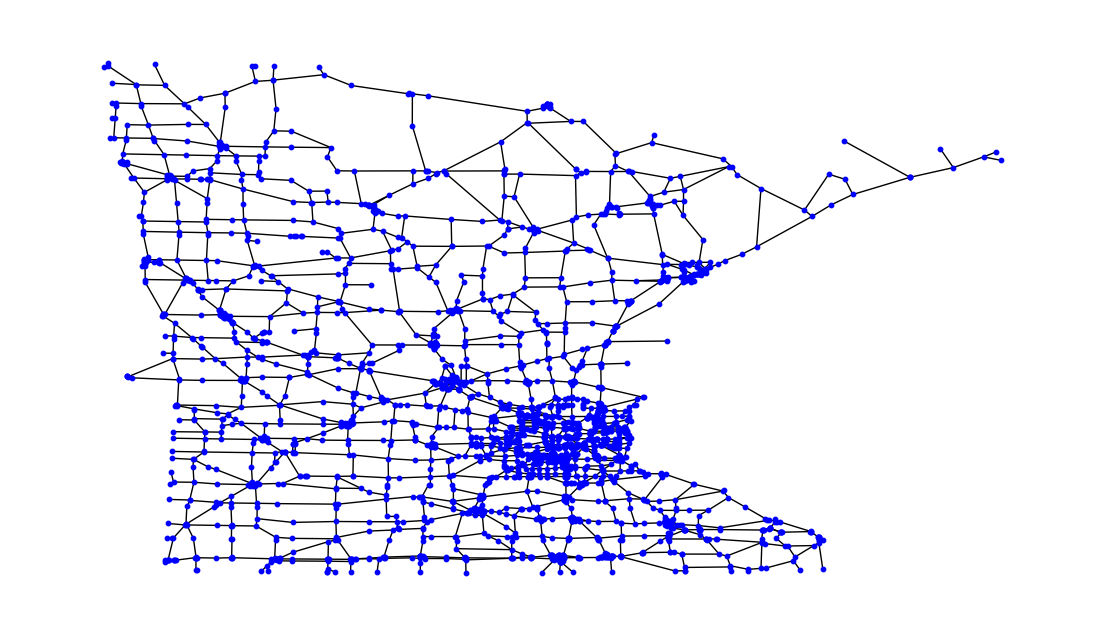

In [79]:
fig, ax = plt.subplots(1,1, figsize=(14,8), dpi=100)

nx.draw(G, pos, ax=ax, node_size=10, node_color='blue', edge_color='black', with_labels=False)
plt.show()


# 2

Construct its Laplacian matrix (D-A); generate a random function x on the graph and apply the laplacian (L*x);
plot x and L*x on the graph. now do the same with the function x defined by the y-coordinates of the minnesota graph nodes

In [80]:
def laPlaceMatrix(G):
    A = nx.adjacency_matrix(G).todense()
    D = np.zeros((len(A), len(A)))
    for i in range(len(A)):
        D[i,i] = np.sum(A[i])
    return D - A


In [81]:
def randomFunction(min = -200, max = 200):
    f = np.random.randint(min, max, size=(len(L)))
    return f

In [82]:
def yCoordinateFunction(G):
    y = np.zeros(len(G))
    for i in range(len(G)):
        y[i] = G.nodes[i]['pos'][1]
    return y

Nota: fare  A@x e (A * x).sum(1) restituisce lo stesso risultato

In [83]:
n = len(G)


L = laPlaceMatrix(G) [:n,:n]
y = yCoordinateFunction(G) [:n]
x_rand = randomFunction(min=np.min(y), max=np.max(y)) [:n]
#print the minimum and maximum values of the random function
print("Random Function")
print(f"Min: {np.min(x_rand)}")
print(f"Max: {np.max(x_rand)}")
print("Y Coordinate Function")
print(f"Min: {np.min(y)}")
print(f"Max: {np.max(y)}")


Lx_rand = L @ x_rand
Ly = L @ y

Random Function
Min: -129
Max: 252
Y Coordinate Function
Min: -129.57694
Max: 253.69115


In [84]:
def plotValoriGrafo(G, L):
    min = np.min(L)
    max = np.max(L)
    #define number of colors
    n = 10
    #make the color map from blue to red
    cmap = plt.get_cmap('coolwarm', n)
    #define the range of the color map
    print(f"Min: {min}, Max: {max}")
    bounds = np.linspace(min, max, n)
    print(f"Bounds: {bounds.shape}")
    #generate a color for each value in bounds
    norm = plt.Normalize(min, max)
    print(f"Norm: {norm}")
    colors = cmap(norm(L))
    print(f"Colors: {colors.shape}")
    fig, ax = plt.subplots(1,1, figsize=(14,8), dpi=100)
    nx.draw(G, pos, ax=ax, node_size=10, node_color=colors, edge_color='black', with_labels=False)
    plt.show()


    

    

Min: -61.16952000000002, Max: 49.577439999999996
Bounds: (10,)
Norm: <matplotlib.colors.Normalize object at 0x00000211A49467D0>
Colors: (2635, 4)


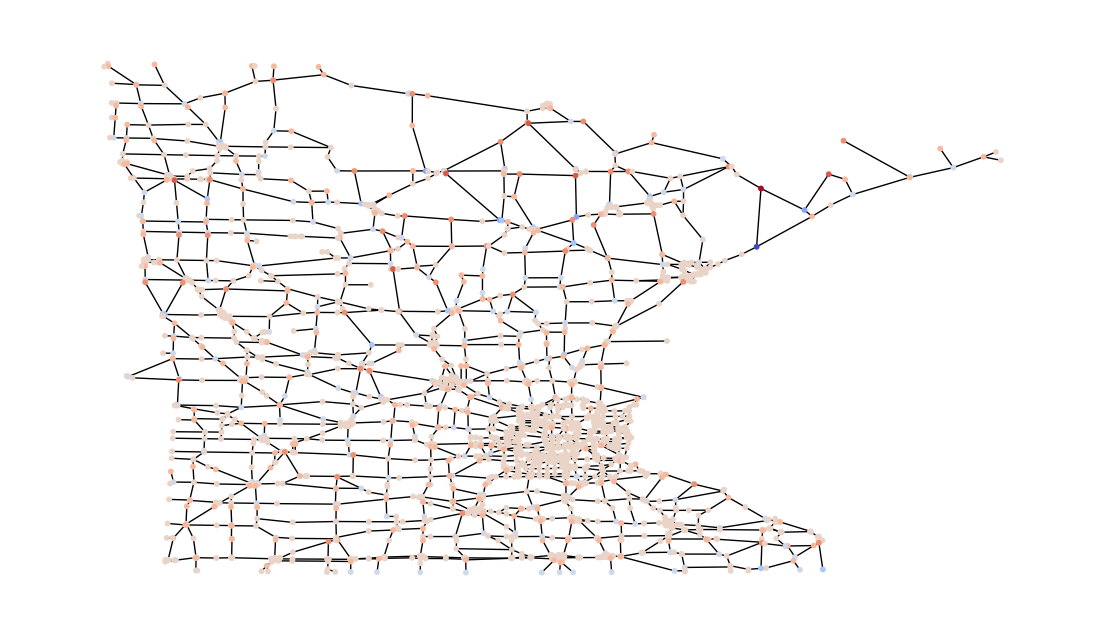

Min: -1151.0, Max: 1068.0
Bounds: (10,)
Norm: <matplotlib.colors.Normalize object at 0x00000211A4946B90>
Colors: (2635, 4)


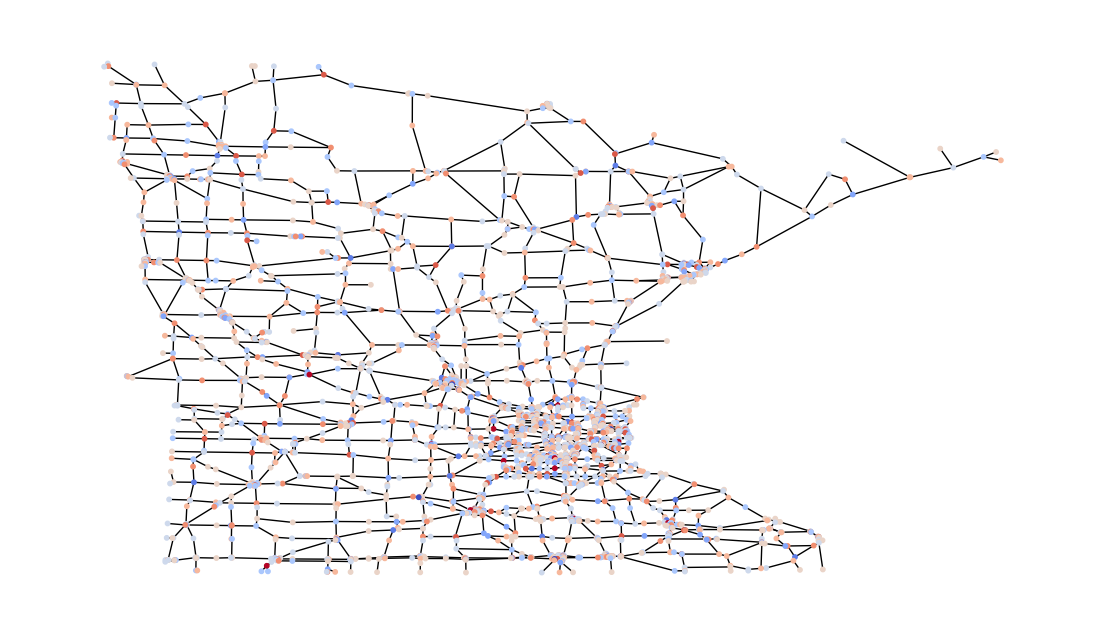

In [85]:


plotValoriGrafo(G, Ly)
plotValoriGrafo(G, Lx_rand)
